In [1]:
# import library
import numpy as np 
import pandas as pd 
import datetime as dt
#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

In [2]:
df=pd.read_excel('Online Retail.xlsx')

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#Finding and Removing null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df= df.dropna(subset=['CustomerID'],)
df.duplicated().sum()
df = df.drop_duplicates()

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [9]:
text = ' '.join(df['Description']) 
# Creating wordcloud object
wordcloud=WordCloud(
    background_color='white',
    width=1200,
    height=1200,
    max_words=30,
).generate(text)

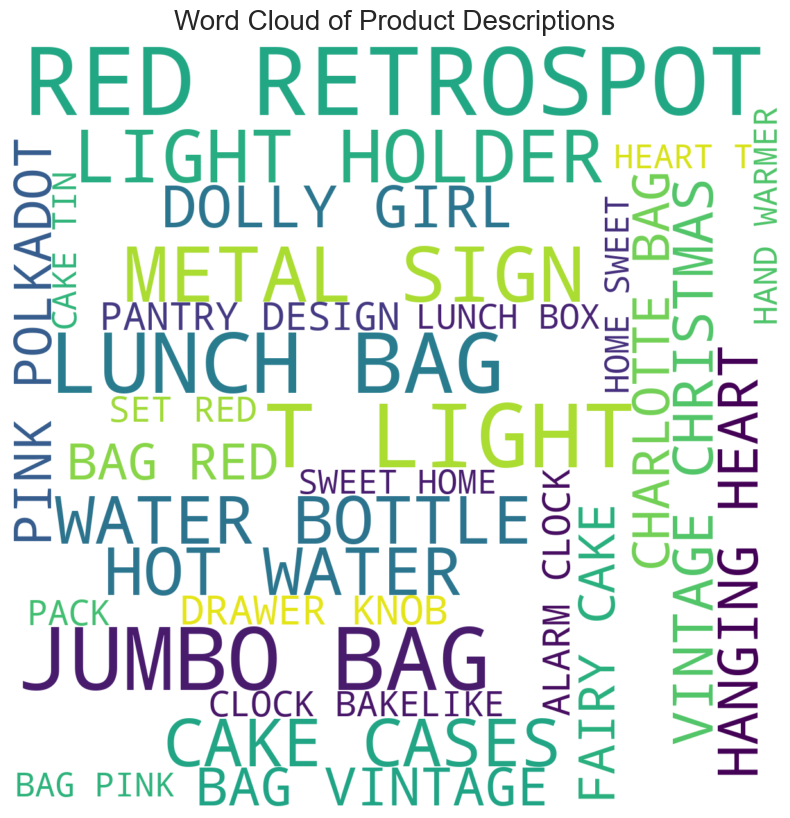

In [10]:
# Setting plot size and style
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
# Display word cloud
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Word Cloud of Product Descriptions', fontsize=20)
plt.show()

In [11]:
freqprod= df.groupby(["StockCode", "Description"])["Description"].count().sort_values(axis= 0,ascending =False)
freqprod.head()

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2058
22423      REGENCY CAKESTAND 3 TIER              1894
85099B     JUMBO BAG RED RETROSPOT               1659
47566      PARTY BUNTING                         1409
84879      ASSORTED COLOUR BIRD ORNAMENT         1405
Name: Description, dtype: int64

In [12]:
top5freq = freqprod[:5,].sort_values(ascending = True)

In [13]:
top5freq

StockCode  Description                       
84879      ASSORTED COLOUR BIRD ORNAMENT         1405
47566      PARTY BUNTING                         1409
85099B     JUMBO BAG RED RETROSPOT               1659
22423      REGENCY CAKESTAND 3 TIER              1894
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2058
Name: Description, dtype: int64

Text(0.5, 1.0, 'Most Frequently Sold Products')

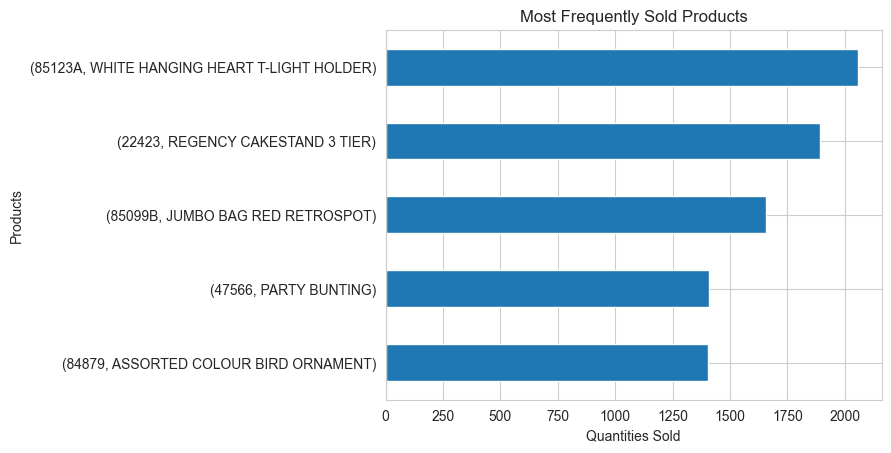

In [14]:
top5freq.plot(kind = "barh")
plt.ylabel('Products')
plt.xlabel('Quantities Sold')
plt.title('Most Frequently Sold Products')

In [15]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")

In [16]:
print(df['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [17]:
# Extract month from 'InvoiceDate'
df['Month']=df['InvoiceDate'].dt.month

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12


In [19]:
# Grouping StockCode, Description and Month with InvoiceNo to find Frequently bought items
freq_boug_month_wise = df.groupby(["StockCode", "Description", "Month"])["InvoiceNo"].nunique().sort_values(ascending=False)

In [20]:
freq_boug_month_wise.head()

StockCode  Description                         Month
23084      RABBIT NIGHT LIGHT                  11       443
22086      PAPER CHAIN KIT 50'S CHRISTMAS      11       344
23355      HOT WATER BOTTLE KEEP CALM          11       261
85123A     WHITE HANGING HEART T-LIGHT HOLDER  12       259
22910      PAPER CHAIN KIT VINTAGE CHRISTMAS   11       237
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Most Frequently Sold Products Month-Wise')

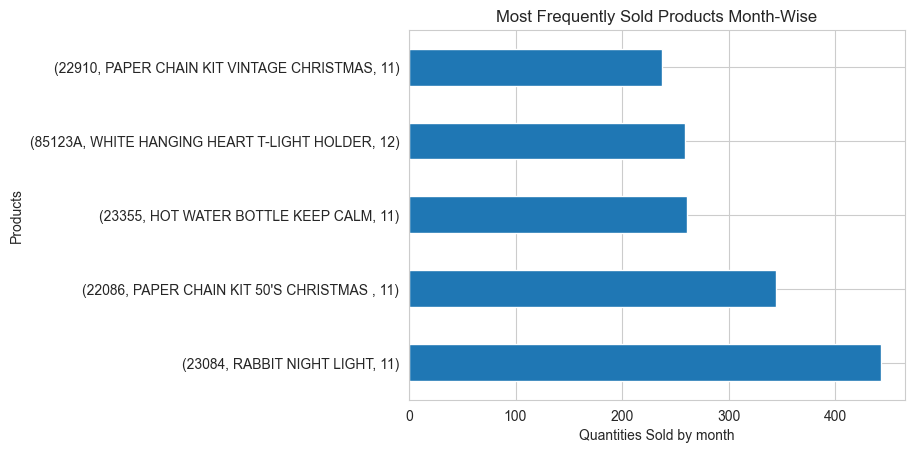

In [21]:
freq_boug_month_wise.head().plot(kind = "barh")
plt.ylabel('Products')
plt.xlabel('Quantities Sold by month')
plt.title('Most Frequently Sold Products Month-Wise')

## RFM analysis

In [22]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['TotalAmount'].max(),df['TotalAmount'].min()

(168469.6, -168469.6)

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [24]:
df['Quantity'].min()

-80995

In [25]:
df[df['TotalAmount'] < 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,12,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12,-1.25


In [26]:
df[df['Quantity'] < 0]  # Check if negative quantity exists
df[df['UnitPrice'] < 0]  # Check if negative unit price exists

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalAmount


In [27]:
df = df[df['TotalAmount'] > 0]

In [28]:
df['TotalAmount'].min()

0.001

In [29]:
# Calculate Recency (days since last purchase)
latest_date = df['InvoiceDate'].max()
df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (latest_date - x.max()).days)
# Calculate Frequency (number of unique purchases)
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
# Calculate Monetary Value (total amount spent)
df['Monetary'] = df.groupby('CustomerID')['TotalAmount'].transform('sum')

C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\3752254963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (latest_date - x.max()).days)
C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\3752254963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\3752254963.py:7: SettingWithCopyWarning: 
A value is 

In [30]:
# Drop duplicates to get a final RFM dataset per customer
rfm = df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()

print(rfm.head())

    CustomerID  Recency  Frequency  Monetary
0      17850.0      371         34   5391.21
9      13047.0       31         10   3237.54
26     12583.0        2         15   7281.38
46     13748.0       95          5    948.25
65     15100.0      333          3    876.00


In [31]:
# Define quartile labels
r_labels = range(4, 0, -1)  # Higher recency (recent purchase) gets lower score
f_labels = range(1, 5)  # Higher frequency gets a higher score
m_labels = range(1, 5)  # Higher monetary value gets a higher score
# Applying quartiles
df['R_Quartile']=pd.qcut(df['Recency'],q=4,labels=r_labels)
# Use `pd.cut()` for `Frequency` if duplicate values cause `qcut()` to drop bins
df['F_Quartile'] = pd.cut(df['Frequency'], bins=4, labels=f_labels, include_lowest=True)
df['M_Quartile']=pd.qcut(df['Monetary'],q=4,labels=m_labels)

C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\1794760484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R_Quartile']=pd.qcut(df['Recency'],q=4,labels=r_labels)
C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\1794760484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_Quartile'] = pd.cut(df['Frequency'], bins=4, labels=f_labels, include_lowest=True)
C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\1794760484.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [32]:
# Combine RFM scores into a single column
df['RFM_Score'] = df['R_Quartile'].astype(str) + df['F_Quartile'].astype(str) + df['M_Quartile'].astype(str)

print(df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFM_Score']])

        CustomerID  Recency  Frequency  Monetary R_Quartile F_Quartile  \
0          17850.0      371         34   5391.21          1          1   
1          17850.0      371         34   5391.21          1          1   
2          17850.0      371         34   5391.21          1          1   
3          17850.0      371         34   5391.21          1          1   
4          17850.0      371         34   5391.21          1          1   
...            ...      ...        ...       ...        ...        ...   
541904     12680.0        0          4    862.81          4          1   
541905     12680.0        0          4    862.81          4          1   
541906     12680.0        0          4    862.81          4          1   
541907     12680.0        0          4    862.81          4          1   
541908     12680.0        0          4    862.81          4          1   

       M_Quartile RFM_Score  
0               3       113  
1               3       113  
2               3    

C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\2049063241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RFM_Score'] = df['R_Quartile'].astype(str) + df['F_Quartile'].astype(str) + df['M_Quartile'].astype(str)


In [33]:
# Build RFM Segment and RFM Score
def add_rfm(x): 
    return str(x['R_Quartile']) + str(x['F_Quartile']) + str(x['M_Quartile'])

df['RFM_Segment'] = df.apply(add_rfm, axis=1)
df['RFM_Score'] = df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Define customer segments
def segments(df):
    if df['RFM_Score'] > 9:
        return 'Gold'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9):
        return 'Silver'
    else:
        return 'Bronze'

df['General_Segment'] = df.apply(segments, axis=1)

# Analyze segment characteristics
print(df.groupby('General_Segment').agg({'Recency': 'mean', 
                                        'Frequency': 'mean', 
                                        'Monetary': ['mean', 'count']}).round(1))

C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\1548607176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RFM_Segment'] = df.apply(add_rfm, axis=1)
C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\1548607176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RFM_Score'] = df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)


                Recency Frequency Monetary        
                   mean      mean     mean   count
General_Segment                                   
Bronze             82.6       3.8   1292.9  165493
Gold                0.6     135.5  78213.3   29225
Silver             10.4      14.1  10314.6  197974


C:\Users\sidha\AppData\Local\Temp\ipykernel_17712\1548607176.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['General_Segment'] = df.apply(segments, axis=1)


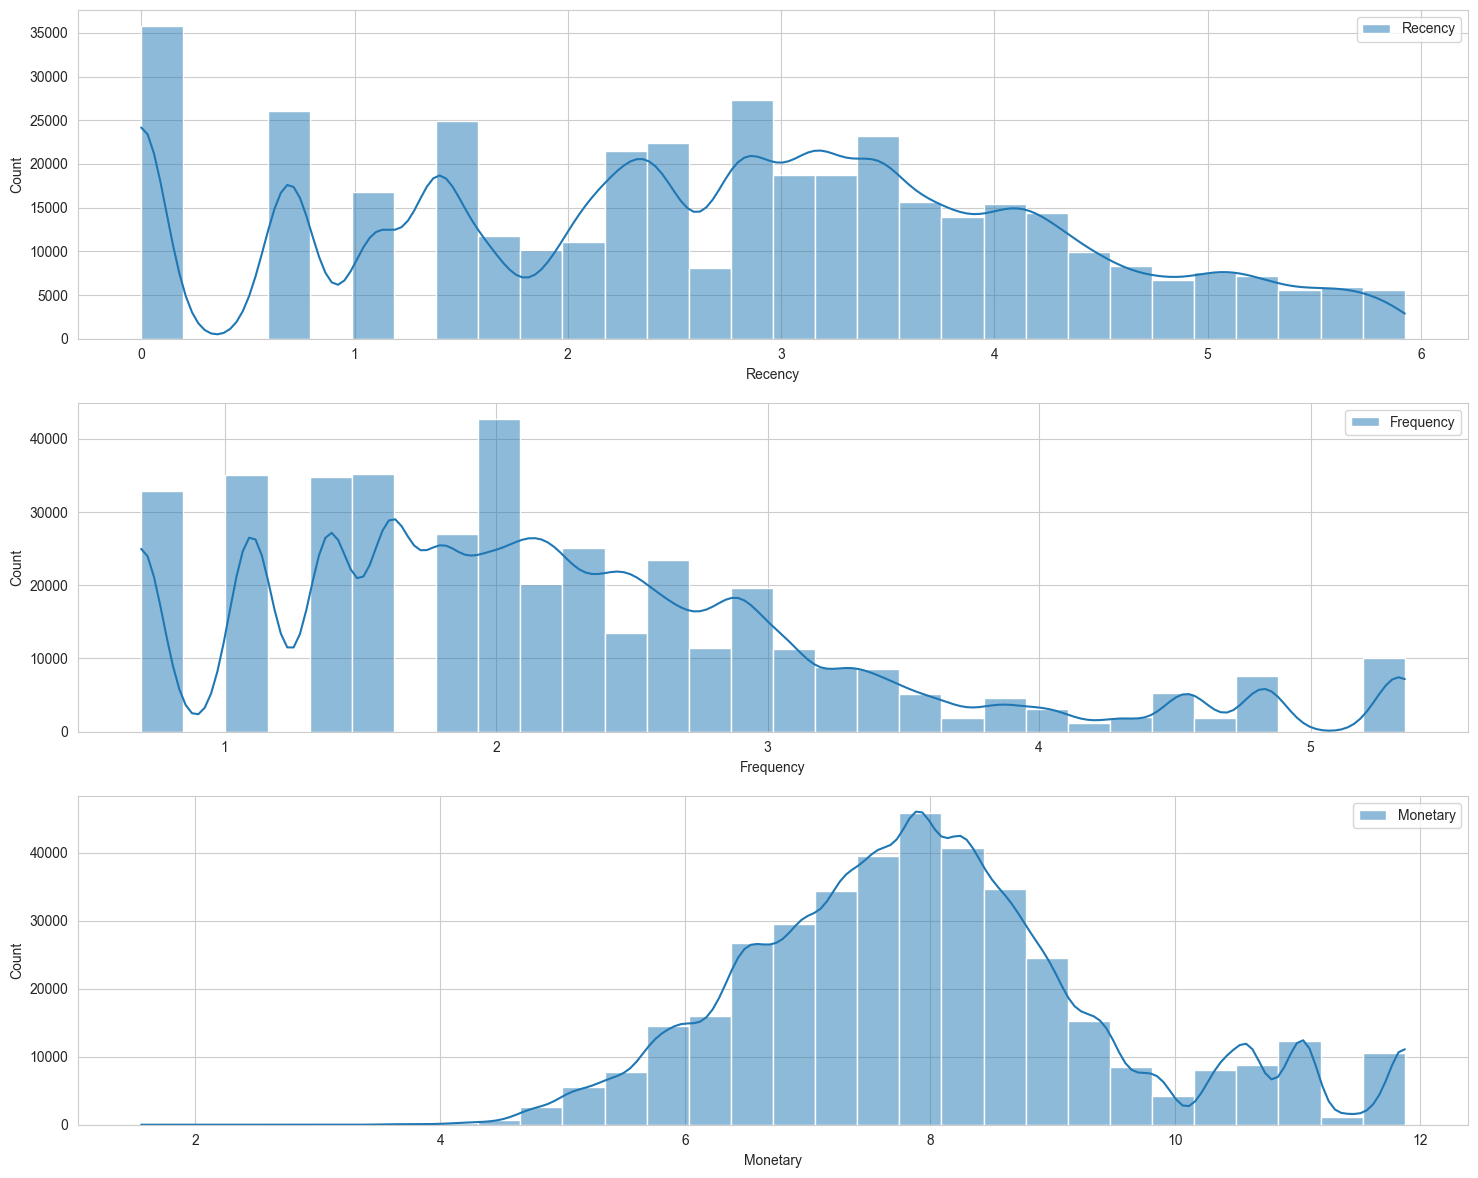

In [34]:
# Apply log transformation (column-wise)
rfm_log = df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p).round(3)

# Handle large values in Monetary (clipping upper bound at 99th percentile)
upper_bound = rfm_log['Monetary'].quantile(0.99)
rfm_log['Monetary'] = rfm_log['Monetary'].clip(upper=upper_bound)  # Fix column name

# Plot the distribution of log-transformed RFM values
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
sns.histplot(rfm_log['Recency'], label='Recency', kde=True, bins=30)
plt.legend()

plt.subplot(3, 1, 2)
sns.histplot(rfm_log['Frequency'], label='Frequency', kde=True, bins=30)
plt.legend()

plt.subplot(3, 1, 3)
sns.histplot(rfm_log['Monetary'], label='Monetary', kde=True, bins=30)
plt.legend()

# Use consistent style and layout
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [35]:
rfm_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Recency    392692 non-null  float64
 1   Frequency  392692 non-null  float64
 2   Monetary   392692 non-null  float64
dtypes: float64(3)
memory usage: 12.0 MB


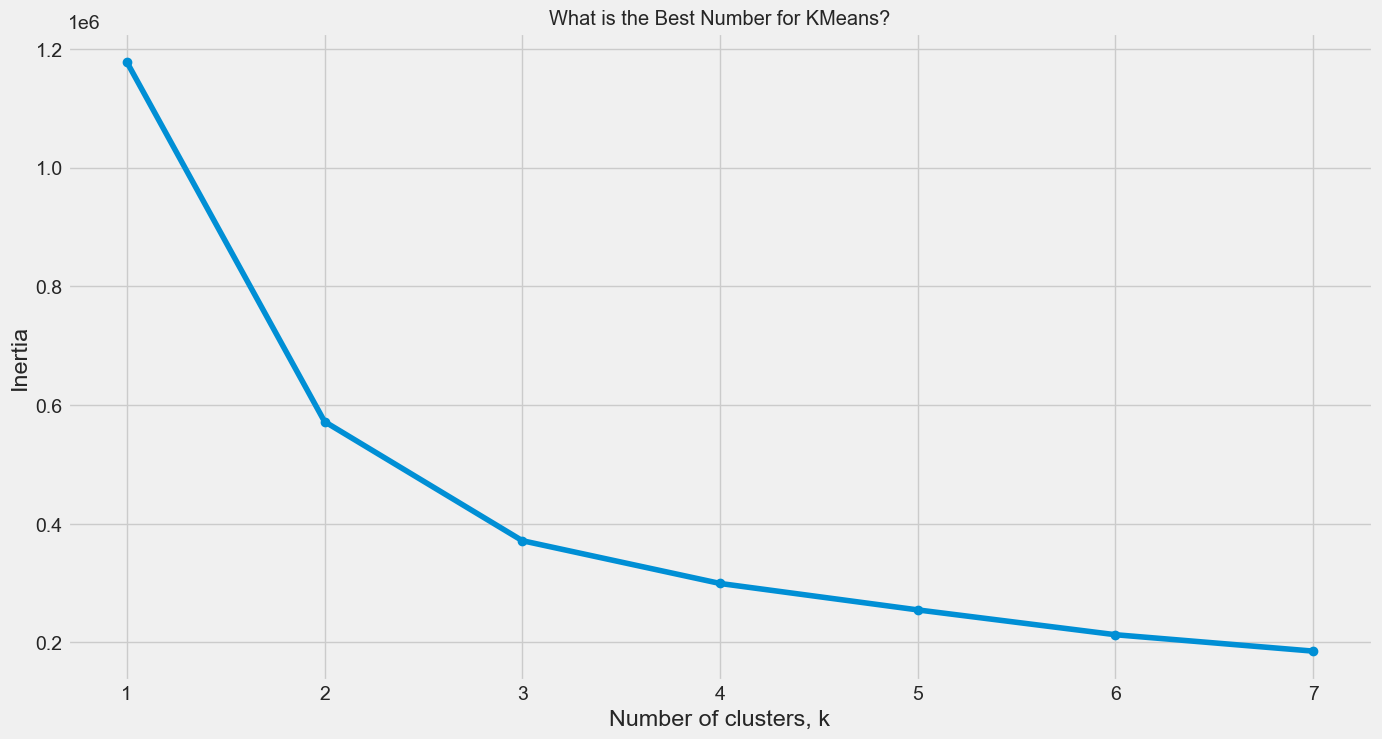

In [36]:
from sklearn.metrics import silhouette_score
# Standardize data using StandardScaler
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_log)

# Find the best KMeans
ks = range(1, 8)  # Test for clusters from 1 to 7
inertias = []

for k in ks:
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)


# Plot the Elbow Curve
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

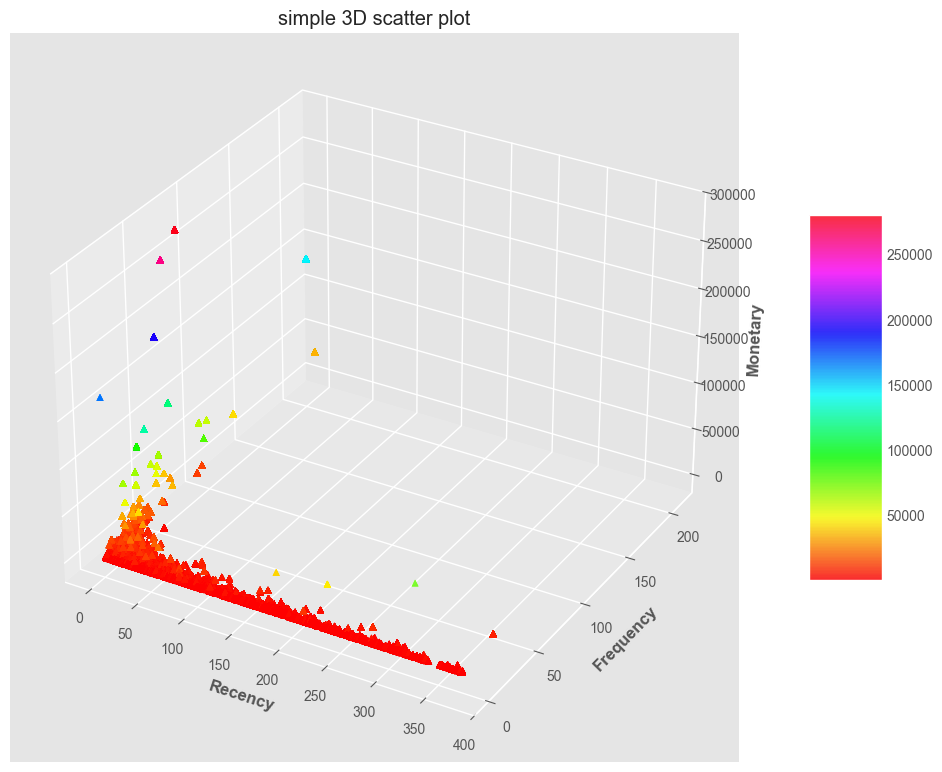

In [37]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
z = df['Monetary']
x = df['Recency']
y = df['Frequency']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('Recency', fontweight ='bold') 
ax.set_ylabel('Frequency', fontweight ='bold') 
ax.set_zlabel('Monetary', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

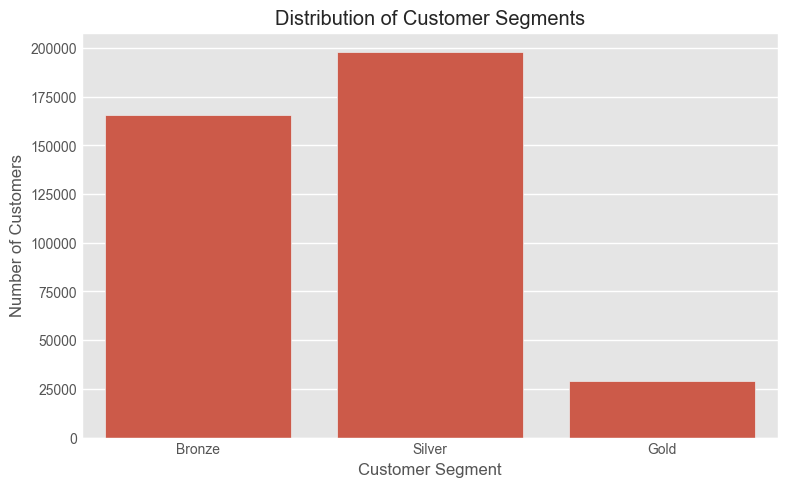

In [38]:
# 1. Visualize Segment Distributions
# - Create a bar chart to visualize the distribution of customers across segments.
plt.figure(figsize=(8, 5))
sns.countplot(x='General_Segment', data=df)
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

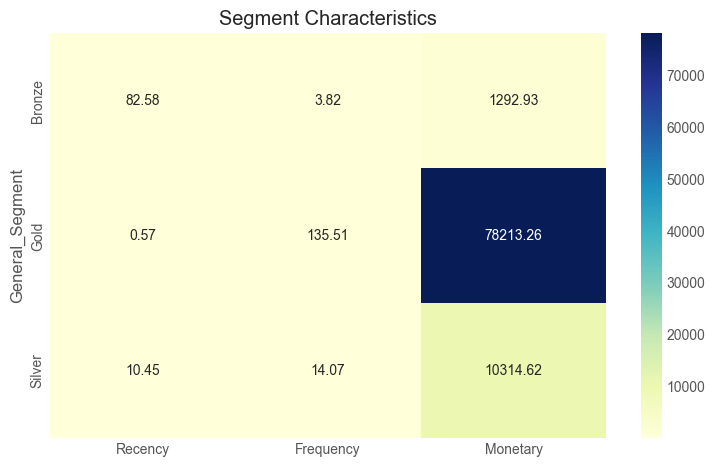

In [39]:
# - Visualize the mean values of Recency, Frequency, and Monetary for each segment in a heatmap.
plt.figure(figsize=(8, 5))
sns.heatmap(df.groupby('General_Segment').agg({'Recency': 'mean',
                                             'Frequency': 'mean',
                                             'Monetary': 'mean'}),
            annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Segment Characteristics')
plt.show()

In [40]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalAmount,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,RFM_Segment,General_Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,371,34,5391.21,1,1,3,5,113,Bronze
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,371,34,5391.21,1,1,3,5,113,Bronze
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,371,34,5391.21,1,1,3,5,113,Bronze
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,371,34,5391.21,1,1,3,5,113,Bronze
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,371,34,5391.21,1,1,3,5,113,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20,0,4,862.81,4,1,1,6,411,Silver
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60,0,4,862.81,4,1,1,6,411,Silver
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,0,4,862.81,4,1,1,6,411,Silver
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,0,4,862.81,4,1,1,6,411,Silver


In [41]:
df['General_Segment'].value_counts()

General_Segment
Silver    197974
Bronze    165493
Gold       29225
Name: count, dtype: int64

In [42]:
df[df['General_Segment']=='Silver']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalAmount,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,RFM_Segment,General_Segment
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,12,54.08,31,10,3237.54,2,1,3,6,213,Silver
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12,12.60,31,10,3237.54,2,1,3,6,213,Silver
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12,12.60,31,10,3237.54,2,1,3,6,213,Silver
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,12,30.00,31,10,3237.54,2,1,3,6,213,Silver
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom,12,9.90,31,10,3237.54,2,1,3,6,213,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20,0,4,862.81,4,1,1,6,411,Silver
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60,0,4,862.81,4,1,1,6,411,Silver
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,0,4,862.81,4,1,1,6,411,Silver
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,0,4,862.81,4,1,1,6,411,Silver
